In [1]:
import pandas as pd
df=pd.read_csv('Dataset .csv')

In [2]:
df.dropna(inplace=True)

In [3]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded_df = encoder.fit_transform(df[['Cuisines','Locality']])


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(encoded_df,df['Aggregate rating'],test_size=0.2,random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train ,y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse:.2f},R-squared: {r2:.2f}')

MSE: 1.48,R-squared: 0.35


In [7]:
coefficients=model.coef_
print(coefficients)
importances = abs(coefficients)
importances = importances/importances.sum()
print(importances)

[-1.2781986   0.         -1.12374295 ...  0.463247   -0.07045899
  0.15302619]
[7.34789034e-04 0.00000000e+00 6.45998201e-04 ... 2.66303545e-04
 4.05042648e-05 8.79690891e-05]


In [8]:
categories = encoder.categories_
new_data = pd.DataFrame({'Cuisines': [categories[0][0], categories[0][1], categories[0][0]], 
                         'Locality': [categories[1][0], categories[1][1], categories[1][0]]})
new_data_encoded = encoder.transform(new_data)
new_pred = model.predict(new_data_encoded.toarray())
print(new_pred)

[4.31865877 4.5525909  4.31865877]


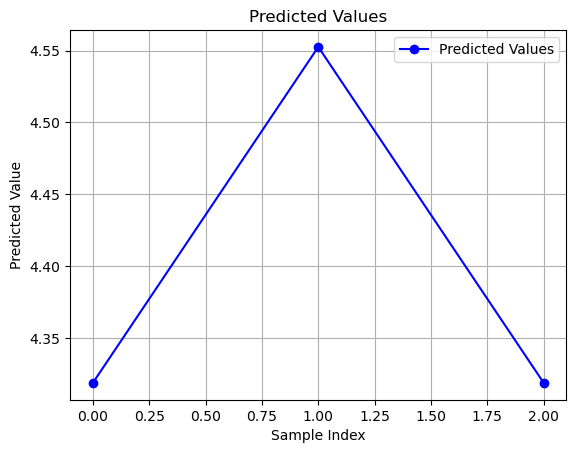

In [9]:
import matplotlib.pyplot as plt
plt.plot(new_pred, marker='o', linestyle='-', color='blue', label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
from sklearn.tree import DecisionTreeRegressor


In [11]:
from sklearn.model_selection import cross_val_score


In [12]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [13]:
y_pred_dt = dt_model.predict(X_test)



In [14]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt:.2f}, R-squared (Decision Tree): {r2_dt:.2f}')






MSE (Decision Tree): 2.00, R-squared (Decision Tree): 0.12


In [15]:
scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE (Decision Tree): {-scores.mean():.2f}')
scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE (Decision Tree): {-scores.mean():.2f}')








Cross-validated MSE (Decision Tree): 2.01
Cross-validated MSE (Decision Tree): 2.01


[3.8 3.8 3.8]


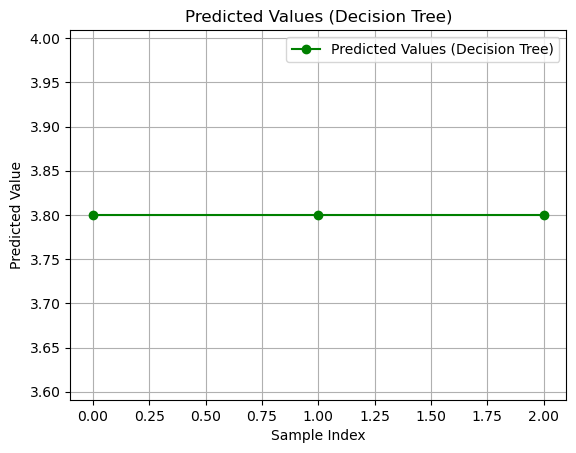

In [16]:
new_pred_dt = dt_model.predict(new_data_encoded.toarray())
print(new_pred_dt)

# Plot the predicted values
plt.plot(new_pred_dt, marker='o', linestyle='-', color='green', label='Predicted Values (Decision Tree)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Predicted Values (Decision Tree)')
plt.grid(True)
plt.legend()
plt.show()


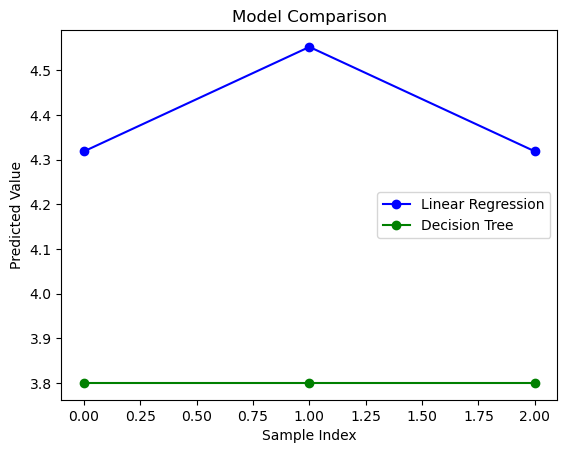

In [17]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the predicted values for Linear Regression
ax.plot(new_pred, marker='o', linestyle='-', color='blue', label='Linear Regression')

# Plot the predicted values for Decision Tree
ax.plot(new_pred_dt, marker='o', linestyle='-', color='green', label='Decision Tree')

# Set title and labels
ax.set_title('Model Comparison')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Predicted Value')

# Add legend
ax.legend()

# Show the plot
plt.show()